<BarContainer object of 33 artists>

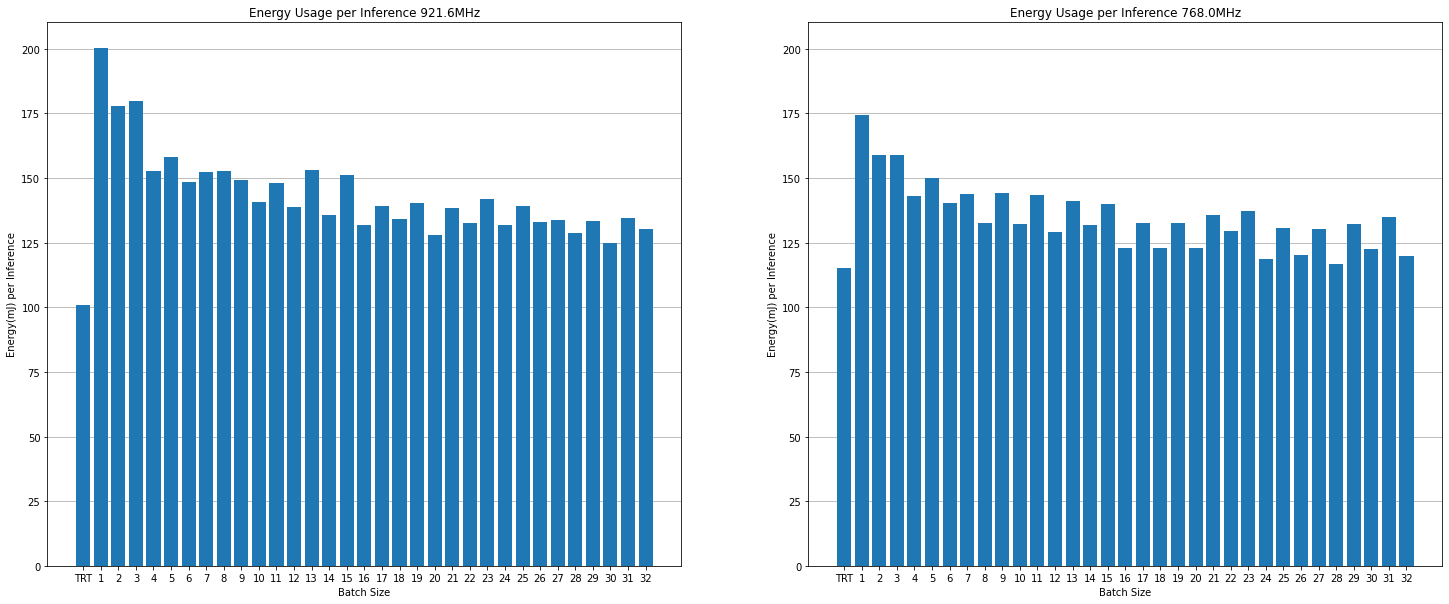

In [12]:
import matplotlib.pyplot as plt

max_frequency = "921600000"
eff_frequency = "768000000"

# Batch Size,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,p90 latency,p95 latency,p99 latency


# GPU Max
max_gpu_data = []
max_gpu_power_data = []
max_gpu_timings = []

with open(f"data/nano/{max_frequency}_data.csv", "r") as f:
  max_gpu_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{max_frequency}_power.csv", "r") as f:
  max_gpu_power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/nano/{max_frequency}_timings.csv", "r") as f:
  max_gpu_timings = [l.strip().split(",") for l in f.readlines()[1:]]


# GPU Eff
eff_gpu_data = []
eff_gpu_power_data = []
eff_gpu_timings = []

with open(f"data/nano/{eff_frequency}_data.csv", "r") as f:
  eff_gpu_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{eff_frequency}_power.csv", "r") as f:
  eff_gpu_power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/nano/{eff_frequency}_timings.csv", "r") as f:
  eff_gpu_timings = [l.strip().split(",") for l in f.readlines()[1:]]


# DLA Max
dla_max_data = []
dla_max_power_data = []
dla_max_timings = []

with open(f"data/nano/{eff_frequency}_dla_data.csv", "r") as f:
  dla_max_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{eff_frequency}_dla_power.csv", "r") as f:
  dla_max_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{eff_frequency}_dla_timings.csv", "r") as f:
  dla_max_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_max_power_data if p[0] > dla_max_timings[0][0] and p[0] < dla_max_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference = avg_dla_power / float(dla_max_data[0][2])


max_x = ['TRT']
max_y = [joule_per_inference*1000]


# DLA Eff
dla_eff_data = []
dla_eff_power_data = []
dla_eff_timings = []

with open(f"data/nano/{max_frequency}_dla_data.csv", "r") as f:
  dla_eff_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{max_frequency}_dla_power.csv", "r") as f:
  dla_eff_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/nano/{max_frequency}_dla_timings.csv", "r") as f:
  dla_eff_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_eff_power_data if p[0] > dla_eff_timings[0][0] and p[0] < dla_eff_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference = avg_dla_power / float(dla_eff_data[0][2])


eff_x = ['TRT']
eff_y = [joule_per_inference*1000]


for start, stop, batch_size in max_gpu_timings:
  power = [p for p in max_gpu_power_data if p[0] > start and p[0] < stop]
  d = [d for d in max_gpu_data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  max_x.append(batch_size)
  max_y.append(joule_per_inference*1000)

for start, stop, batch_size in eff_gpu_timings:
  power = [p for p in eff_gpu_power_data if p[0] > start and p[0] < stop]
  d = [d for d in eff_gpu_data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  eff_x.append(batch_size)
  eff_y.append(joule_per_inference*1000)




fig, ax = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title(f"Energy Usage per Inference {int(max_frequency)/1000000}MHz")
ax[0].set_xlabel("Batch Size")
ax[0].set_ylabel("Energy(mJ) per Inference")
ax[0].bar(max_x, max_y)

ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].yaxis.set_tick_params(labelleft=True)
ax[1].set_title(f"Energy Usage per Inference {int(eff_frequency)/1000000}MHz")
ax[1].set_xlabel("Batch Size")
ax[1].set_ylabel("Energy(mJ) per Inference")
ax[1].bar(eff_x, eff_y)
